In [1]:
# import the libraries and the MNIST dataset

from keras.datasets import mnist
import numpy as np

# take only the samples and not the labels
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


Pre-flattening shapes:
(60000, 28, 28)
(10000, 28, 28)
The first digit as an array:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

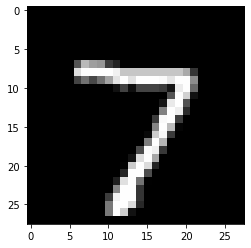

In [2]:
# print the shape of the datasets - 60,000 samples, each being a 28x28 pixel image
# another 10,000 in the test set
print('Pre-flattening shapes:')
print(x_train.shape)
print(x_test.shape)

# print the array of the first sample
print('The first digit as an array:')
np.set_printoptions(linewidth=150)
print(x_test[0])

# finally, display the first sample
# import matplotlib, which we'll use for visualisations
import matplotlib.pyplot as plt

# make sure matplotlib knows the image is black-and-white
plt.gray()
plt.imshow(x_test[0])

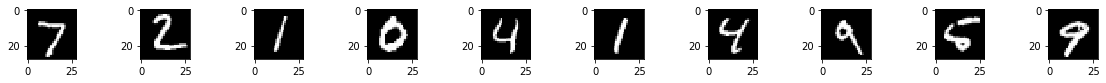

In [3]:
# display the first 10 digits
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()

plt.show()

In [9]:
# normallize - neural networks learn well with normalized inputs
x_train_norm = x_train.astype('float32') / 255.
x_test_norm = x_test.astype('float32') / 255.

# flatten - to avoid convolutional mechanisms
x_train_flat = x_train_norm.reshape((len(x_train_norm), np.prod(x_train_norm.shape[1:])))
x_test_flat = x_test_norm.reshape((len(x_test_norm), np.prod(x_test_norm.shape[1:])))

# print the shape of the dataset after the flattening - 60,000 samples, each with
# a single row of 784 numbers (itself the result of concatenating all rows of the image)
print('Post-flattening shapes:')
print(x_train_flat.shape)
print(x_test_flat.shape)

Post-flattening shapes:
(60000, 784)
(10000, 784)


In [5]:
# import the relevant modules
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# print a summary of the model
autoencoder.summary()




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [6]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [7]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [10]:
import keras
# Keras requires us to 'compile' the models, as below
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])

class PrintAccuracy(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        printed_validation_acc = logs['val_acc']
        print('val_acc=' + str(printed_validation_acc))

print_acc = PrintAccuracy()

callbacks_list = [
    print_acc
]

# finally, we train, or 'fit', the model
autoencoder.fit(x_train_flat, x_train_flat,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flat, x_test_flat),
                verbose = 1,
                callbacks = callbacks_list)




Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 11s 181us/step - loss: 0.3575 - acc: 0.7527 - val_loss: 0.2700 - val_acc: 0.7960
val_acc=0.796029725933075
Epoch 2/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2613 - acc: 0.7973 - val_loss: 0.2491 - val_acc: 0.7968
val_acc=0.7968297233581543
Epoch 3/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2387 - acc: 0.7971 - val_loss: 0.2260 - val_acc: 0.7956
val_acc=0.7956053581237793
Epoch 4/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2182 - acc: 0.7976 - val_loss: 0.2085 - val_acc: 0.7978
val_acc=0.797801151561737
Epoch 5/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2038 - acc: 0.7986 - val_loss: 0.1967 - val_acc: 0.7991
val_acc=0.7991244941711426
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.1935 - acc: 0.7999 - val_loss: 0.1877 - v

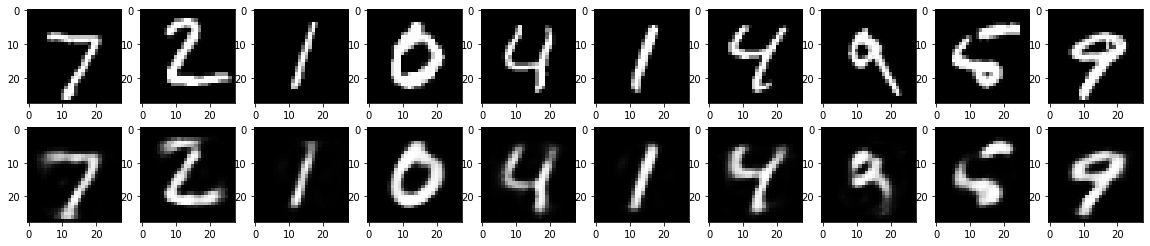

In [11]:
# encode some digits
# note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test_flat)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
plt.show()

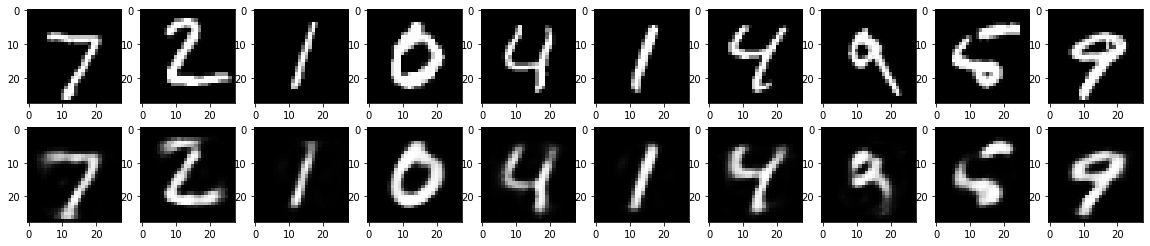

In [12]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_flat)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
plt.show()

#What are the latent vector representations?

In [13]:
# view the latent vector of the first encoded image
test_vector = encoded_imgs[0]
test_vector

array([ 4.373719 ,  7.9978967,  6.75616  ,  4.915035 ,  2.789322 ,  2.7101002, 12.366913 ,  3.0310087,  2.9912877,  6.675118 ,  9.935666 ,
        1.096684 ,  5.9248276, 12.41742  ,  2.4618697,  2.9881165,  5.218267 ,  0.       ,  8.121739 ,  6.465948 ,  1.9187688,  3.1793988,
       11.631401 ,  3.265656 ,  3.3794541,  0.5167349,  5.5547276, 11.489864 ,  2.3625247,  5.2929235,  7.53321  , 11.01918  ], dtype=float32)

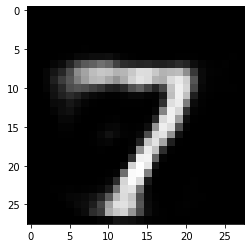

In [14]:
# decode the vector using the decoder model; image should be the same as the 
# first image in the second row of the output above
decoded_image = decoder.predict(np.expand_dims(test_vector, 0))
decoded_image = decoded_image.reshape(28, 28)
plt.imshow(decoded_image)

In [23]:
# change one of the 'dimensions' - one of the numbers in the latent vector, and
# print both versions
print(test_vector)
changed_vector = test_vector.copy()
changed_vector[-1] = 0
print(changed_vector)

[ 4.373719   7.9978967  6.75616    4.915035   2.789322   2.7101002 12.366913   3.0310087  2.9912877  6.675118   9.935666   1.096684   5.9248276
 12.41742    2.4618697  2.9881165  5.218267   0.         8.121739   6.465948   1.9187688  3.1793988 11.631401   3.265656   3.3794541  0.5167349
  5.5547276 11.489864   2.3625247  5.2929235  7.53321   11.01918  ]
[ 4.373719   7.9978967  6.75616    4.915035   2.789322   2.7101002 12.366913   3.0310087  2.9912877  6.675118   9.935666   1.096684   5.9248276
 12.41742    2.4618697  2.9881165  5.218267   0.         8.121739   6.465948   1.9187688  3.1793988 11.631401   3.265656   3.3794541  0.5167349
  5.5547276 11.489864   2.3625247  5.2929235  7.53321    0.       ]


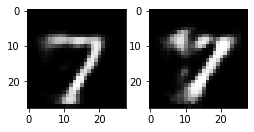

In [24]:
# decode and display the vectors above to inspect what the vector change did
plt.figure(figsize=(4, 4))

original_vector = decoder.predict(np.expand_dims(test_vector, 0))
original_vector = original_vector.reshape(28, 28)
ax1 = plt.subplot(2, 2, 1)
plt.imshow(original_vector)

new_vector = decoder.predict(np.expand_dims(changed_vector, 0))
new_vector = new_vector.reshape(28, 28)
ax2 = plt.subplot(2, 2, 2)
plt.imshow(new_vector)

plt.show()

In [25]:
similarity = np.dot(changed_vector, test_vector)/(np.linalg.norm(changed_vector)*np.linalg.norm(test_vector))
similarity

0.95462114

#What is the similarity between the '7' and the '1'

#Semantic search: 1-hour drive, find all images of junctions

##Face instead of digit

##See Presentation for use cases, other notebooks for conv vs flat

## King - man + woman = Queen
